In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import plotly.express as px
sns.set(style="white", color_codes=True)
import plotly.graph_objects as go

In [3]:
# machine learning
from joblib import parallel_backend
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline, FeatureUnion
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler, LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import precision_score,f1_score

import xgboost as xgb
import lightgbm as lgb

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier,Pool

from wordcloud import WordCloud 
import missingno as msno


In [4]:
data= pd.read_csv("appstore_games.csv")
data.head()

URL         ID  \
0   https://apps.apple.com/us/app/sudoku/id284921427  284921427   
1  https://apps.apple.com/us/app/reversi/id284926400  284926400   
2  https://apps.apple.com/us/app/morocco/id284946595  284946595   
3  https://apps.apple.com/us/app/sudoku-free/id28...  285755462   
4  https://apps.apple.com/us/app/senet-deluxe/id2...  285831220   

            Name Subtitle                                           Icon URL  \
0         Sudoku      NaN  https://is2-ssl.mzstatic.com/image/thumb/Purpl...   
1        Reversi      NaN  https://is4-ssl.mzstatic.com/image/thumb/Purpl...   
2        Morocco      NaN  https://is5-ssl.mzstatic.com/image/thumb/Purpl...   
3  Sudoku (Free)      NaN  https://is3-ssl.mzstatic.com/image/thumb/Purpl...   
4   Senet Deluxe      NaN  https://is1-ssl.mzstatic.com/image/thumb/Purpl...   

   Average User Rating  User Rating Count  Price In-app Purchases  \
0                  4.0             3553.0   2.99              NaN   
1                  3.5              284.0   1.99              NaN   
2                  3.0             8376.0   0.00              NaN   
3                  3.5           190394.0   0.00              NaN   
4                  3.5               28.0   2.99              NaN   

                                         Description  \
0  Join over 21,000,000 of our fans and download ...   
1  The classic game of Reversi, also known as Oth...   
2  Play the classic strategy game Othello (also k...   
3  Top 100 free app for over a year.\nRated "Best...   
4  "Senet Deluxe - The Ancient Game of Life and A...   

                  Developer Age Rating  \
0  Mighty Mighty Good Games         4+   
1          Kiss The Machine         4+   
2               Bayou Games         4+   
3  Mighty Mighty Good Games         4+   
4           RoGame Software         4+   

                                           Languages        Size  \
0  DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...  15853568.0   
1                                                 EN  12328960.0   
2                                                 EN    674816.0   
3  DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...  21552128.0   
4  DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...  34689024.0   

  Primary Genre                             Genres Original Release Date  \
0         Games            Games, Strategy, Puzzle            11/07/2008   
1         Games             Games, Strategy, Board            11/07/2008   
2         Games             Games, Board, Strategy            11/07/2008   
3         Games            Games, Strategy, Puzzle            23/07/2008   
4         Games  Games, Strategy, Board, Education            18/07/2008   

  Current Version Release Date  
0                   30/05/2017  
1                   17/05/2018  
2                    5/09/2017  
3                   30/05/2017  
4                   22/07/2018

In [5]:
delete_columns = ['URL', 'ID', 'Description', 'Languages']
data = pd.read_csv("appstore_games.csv")
data = data.drop(columns=delete_columns)
new_data = 'new_games_data.csv'
data.to_csv(new_data, index=False)
data.head()

Name Subtitle                                           Icon URL  \
0         Sudoku      NaN  https://is2-ssl.mzstatic.com/image/thumb/Purpl...   
1        Reversi      NaN  https://is4-ssl.mzstatic.com/image/thumb/Purpl...   
2        Morocco      NaN  https://is5-ssl.mzstatic.com/image/thumb/Purpl...   
3  Sudoku (Free)      NaN  https://is3-ssl.mzstatic.com/image/thumb/Purpl...   
4   Senet Deluxe      NaN  https://is1-ssl.mzstatic.com/image/thumb/Purpl...   

   Average User Rating  User Rating Count  Price In-app Purchases  \
0                  4.0             3553.0   2.99              NaN   
1                  3.5              284.0   1.99              NaN   
2                  3.0             8376.0   0.00              NaN   
3                  3.5           190394.0   0.00              NaN   
4                  3.5               28.0   2.99              NaN   

                  Developer Age Rating        Size Primary Genre  \
0  Mighty Mighty Good Games         4+  15853568.0         Games   
1          Kiss The Machine         4+  12328960.0         Games   
2               Bayou Games         4+    674816.0         Games   
3  Mighty Mighty Good Games         4+  21552128.0         Games   
4           RoGame Software         4+  34689024.0         Games   

                              Genres Original Release Date  \
0            Games, Strategy, Puzzle            11/07/2008   
1             Games, Strategy, Board            11/07/2008   
2             Games, Board, Strategy            11/07/2008   
3            Games, Strategy, Puzzle            23/07/2008   
4  Games, Strategy, Board, Education            18/07/2008   

  Current Version Release Date  
0                   30/05/2017  
1                   17/05/2018  
2                    5/09/2017  
3                   30/05/2017  
4                   22/07/2018

In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          17007 non-null  object 
 1   Subtitle                      5261 non-null   object 
 2   Icon URL                      17007 non-null  object 
 3   Average User Rating           7561 non-null   float64
 4   User Rating Count             7561 non-null   float64
 5   Price                         16983 non-null  float64
 6   In-app Purchases              7683 non-null   object 
 7   Developer                     17007 non-null  object 
 8   Age Rating                    17007 non-null  object 
 9   Size                          17006 non-null  float64
 10  Primary Genre                 17007 non-null  object 
 11  Genres                        17007 non-null  object 
 12  Original Release Date         17007 non-null  object 
 13  C

In [7]:
data.describe()            

Average User Rating  User Rating Count         Price          Size
count          7561.000000       7.561000e+03  16983.000000  1.700600e+04
mean              4.060905       3.306531e+03      0.813419  1.157064e+08
std               0.751428       4.232256e+04      7.835732  2.036477e+08
min               1.000000       5.000000e+00      0.000000  5.132800e+04
25%               3.500000       1.200000e+01      0.000000  2.295014e+07
50%               4.500000       4.600000e+01      0.000000  5.676895e+07
75%               4.500000       3.090000e+02      0.000000  1.330271e+08
max               5.000000       3.032734e+06    179.990000  4.005591e+09

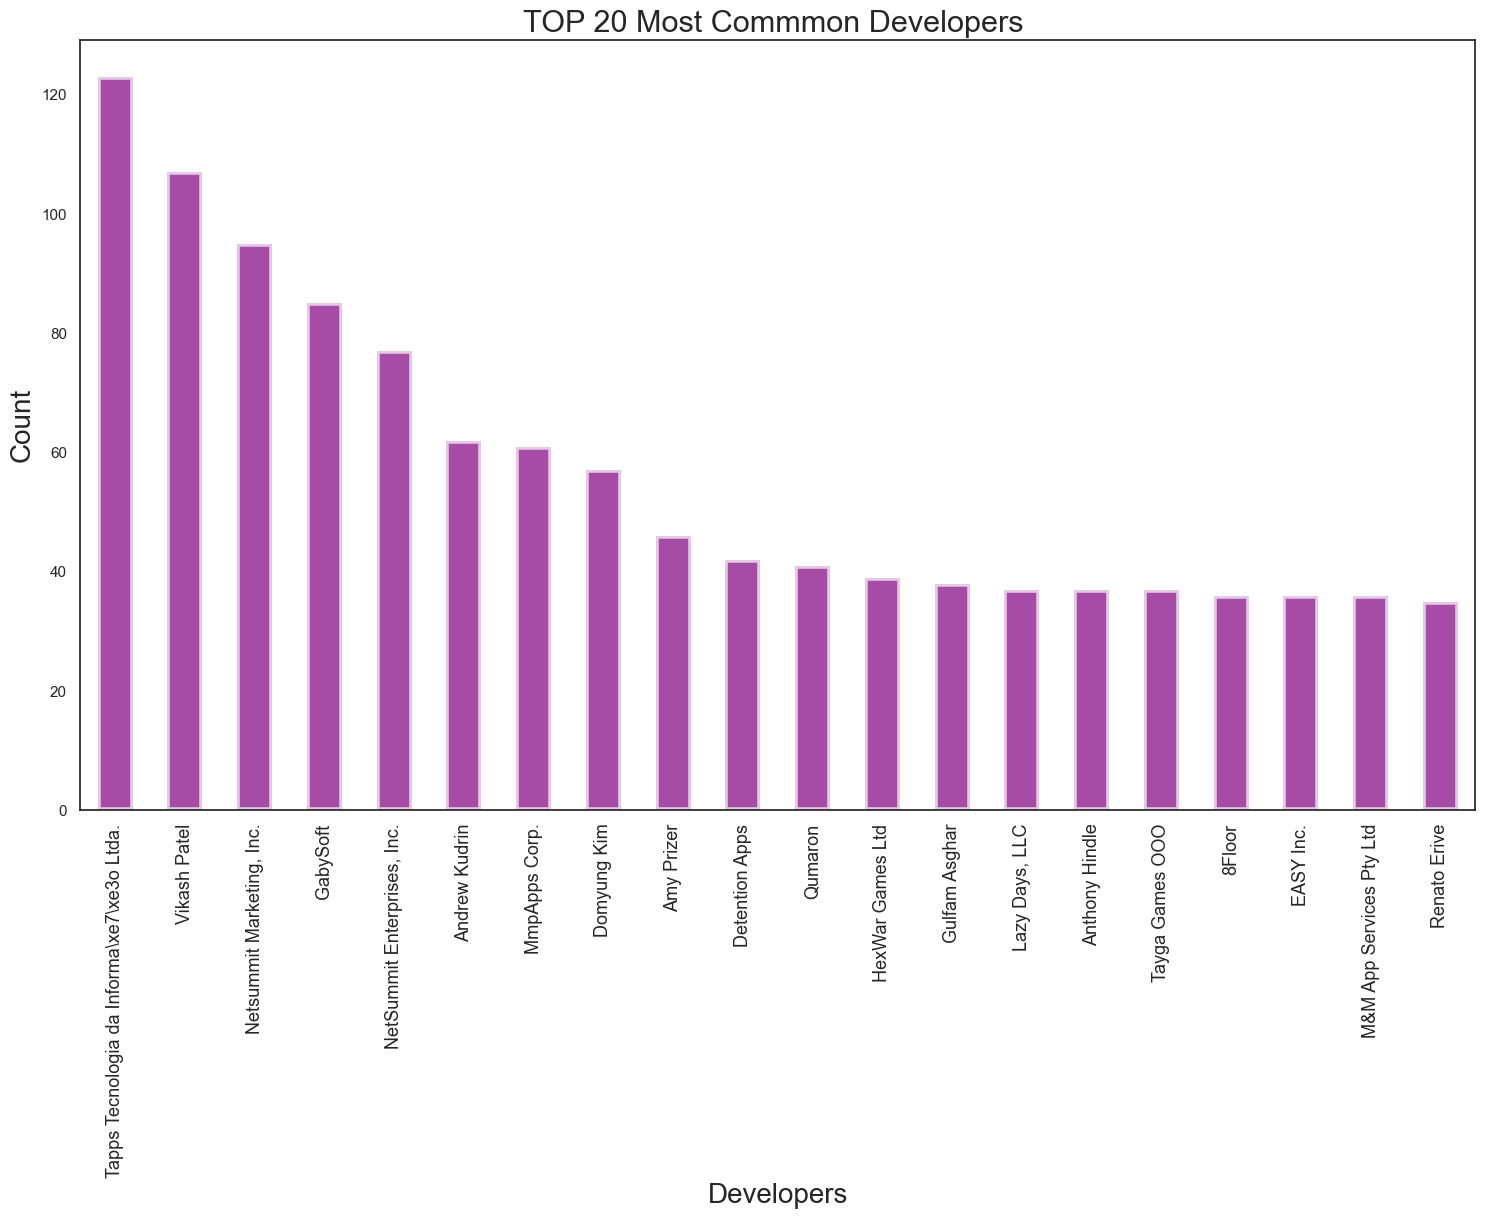

In [8]:
plt.rcParams['figure.figsize'] = (18, 10)
data.Developer.value_counts()[:20].plot(kind='bar',color = 'purple', alpha = 0.7, linewidth=4)
plt.xlabel("Developers", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.title("TOP 20 Most Commmon Developers ", fontsize=22)
plt.xticks(rotation=90, fontsize = 13) 
plt.show()

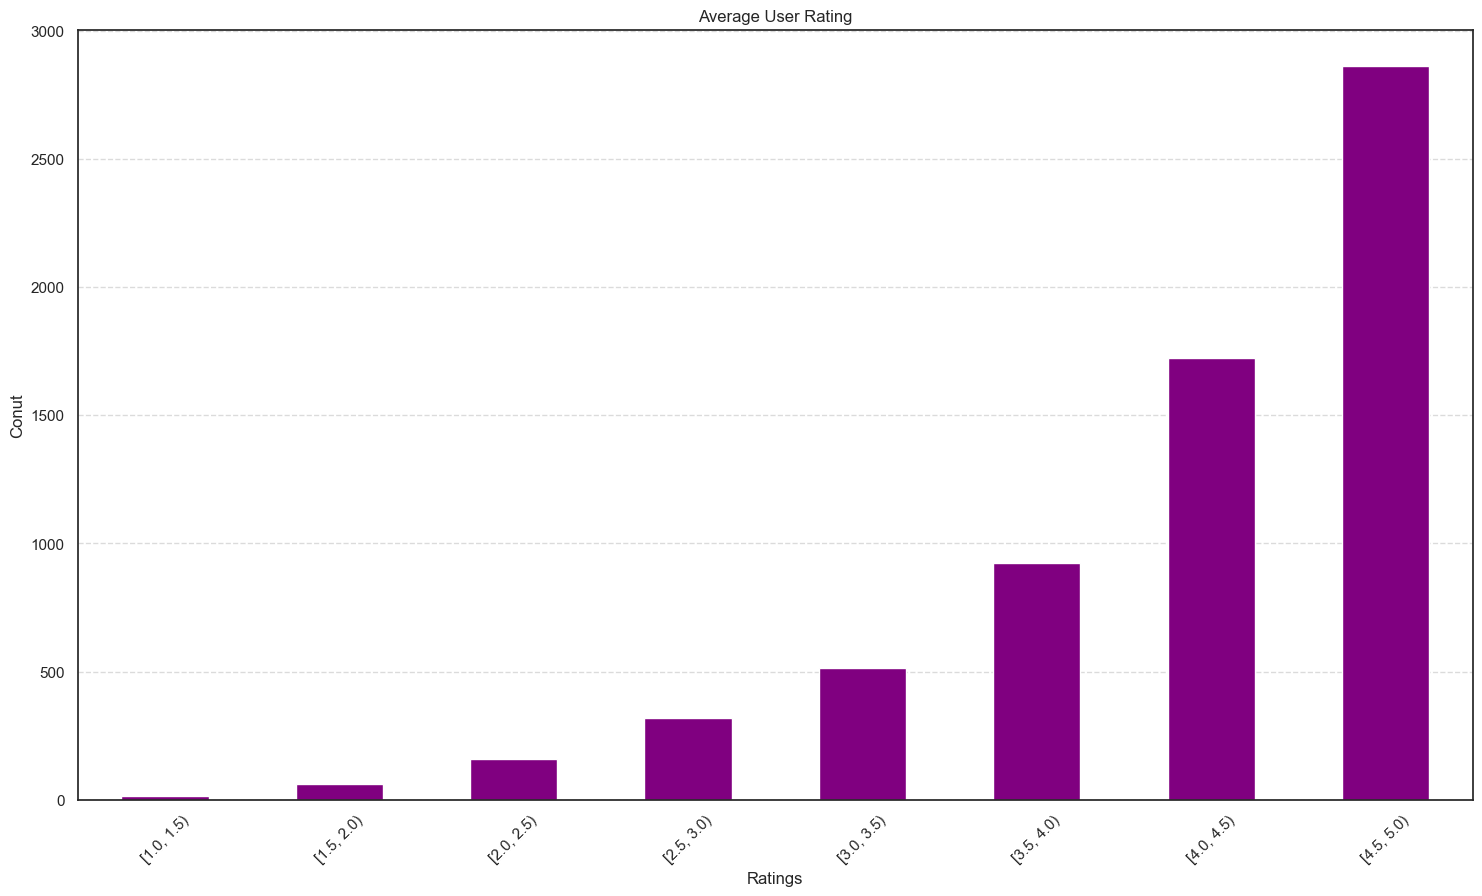

In [9]:
columns_name = 'Average User Rating'
ranges = [1,1.5,2,2.5,3,3.5,4, 4.5,5]
veri_sayilari, _ = pd.cut(data[columns_name], bins=ranges, include_lowest=True, right=False, retbins=True)
veri_sayilari.value_counts().sort_index().plot(kind='bar', color='purple')
plt.xlabel('Ratings')
plt.ylabel('Conut')
plt.title('Average User Rating')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

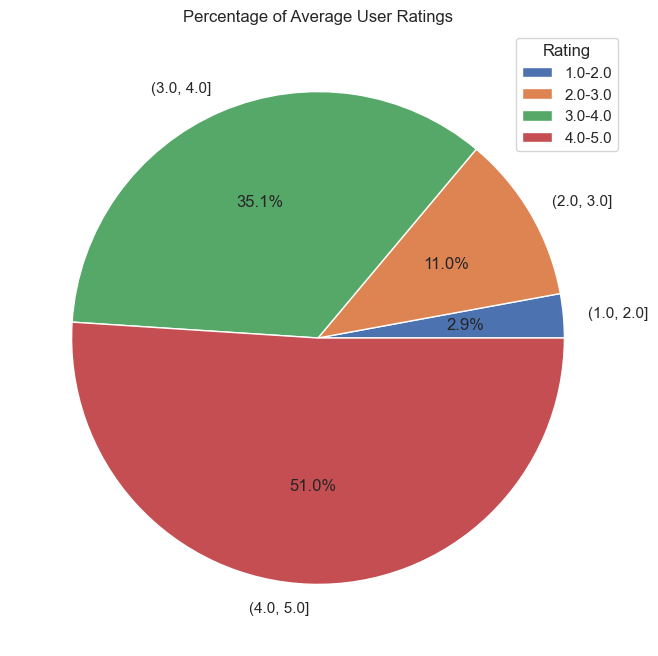

In [10]:
column_name = "Average User Rating"
bin_size = 1
bins = np.arange(min(data[column_name]), max(data[column_name]) + bin_size, bin_size)
data['range'] = pd.cut(data[column_name], bins=bins)
grouped_data = data.groupby('range').size()
percentages = (grouped_data / grouped_data.sum()) * 100
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%')
plt.legend(title="Rating", labels=[f"{bins[i]:.1f}-{bins[i+1]:.1f}" for i in range(len(bins)-1)], loc="upper right")
plt.title('Percentage of Average User Ratings')
plt.show()

In [11]:
#in app purchase average
b = []
for x,y in data.groupby('In-app Purchases')[['Average User Rating']].mean().sort_values(by = ['Average User Rating'], ascending = False).items():
    for w,z in y.items():
        b.append(z)
        
        
temp = []
for x in data['Price']:
    if x == 0.0:
        temp.append(0)
    else:
        temp.append(1) 

In [12]:
#paid average              
d = []
for x,y in data.groupby(temp)[['Average User Rating']].mean().sort_values(by = ['Average User Rating'], ascending = False).items():
    for w,z in y.items():
        d.append(z) 

In [13]:
#free to play
temp1= [x for x in zip(data['Price'], data['In-app Purchases'])]
temp2 = []
for x,y in temp1:
    if x == 0.0 and y == 0:
        temp2.append(1)
    else:
        temp2.append(0)
        
data['FreeToPlay'] = temp2
data.head()


Name Subtitle                                           Icon URL  \
0         Sudoku      NaN  https://is2-ssl.mzstatic.com/image/thumb/Purpl...   
1        Reversi      NaN  https://is4-ssl.mzstatic.com/image/thumb/Purpl...   
2        Morocco      NaN  https://is5-ssl.mzstatic.com/image/thumb/Purpl...   
3  Sudoku (Free)      NaN  https://is3-ssl.mzstatic.com/image/thumb/Purpl...   
4   Senet Deluxe      NaN  https://is1-ssl.mzstatic.com/image/thumb/Purpl...   

   Average User Rating  User Rating Count  Price In-app Purchases  \
0                  4.0             3553.0   2.99              NaN   
1                  3.5              284.0   1.99              NaN   
2                  3.0             8376.0   0.00              NaN   
3                  3.5           190394.0   0.00              NaN   
4                  3.5               28.0   2.99              NaN   

                  Developer Age Rating        Size Primary Genre  \
0  Mighty Mighty Good Games         4+  15853568.0         Games   
1          Kiss The Machine         4+  12328960.0         Games   
2               Bayou Games         4+    674816.0         Games   
3  Mighty Mighty Good Games         4+  21552128.0         Games   
4           RoGame Software         4+  34689024.0         Games   

                              Genres Original Release Date  \
0            Games, Strategy, Puzzle            11/07/2008   
1             Games, Strategy, Board            11/07/2008   
2             Games, Board, Strategy            11/07/2008   
3            Games, Strategy, Puzzle            23/07/2008   
4  Games, Strategy, Board, Education            18/07/2008   

  Current Version Release Date       range  FreeToPlay  
0                   30/05/2017  (3.0, 4.0]           0  
1                   17/05/2018  (3.0, 4.0]           0  
2                    5/09/2017  (2.0, 3.0]           0  
3                   30/05/2017  (3.0, 4.0]           0  
4                   22/07/2018  (3.0, 4.0]           0

In [14]:
f = []
for x,y in data.groupby('FreeToPlay')[['Average User Rating']].mean().sort_values(by = ['Average User Rating'], ascending = False).items():
    for w,z in y.items():
        f.append(z)

In [15]:
fig = go.Figure(data=[
    go.Bar(name='Price',x =['Has In-app purchases','Pay to download','Free to play'] ,y = (b[1],d[1],f[0]), text=(b[1],d[1],f[0]))])
fig.update_layout(hoverlabel=dict(font=dict(family='sans-serif', size=25)),barmode='relative', template='plotly_white',title_text ='Average user rating per app payment type', font_family="Courier New")
fig.update_xaxes(title_text='App payment type',tickfont_size=20)
fig.show()  

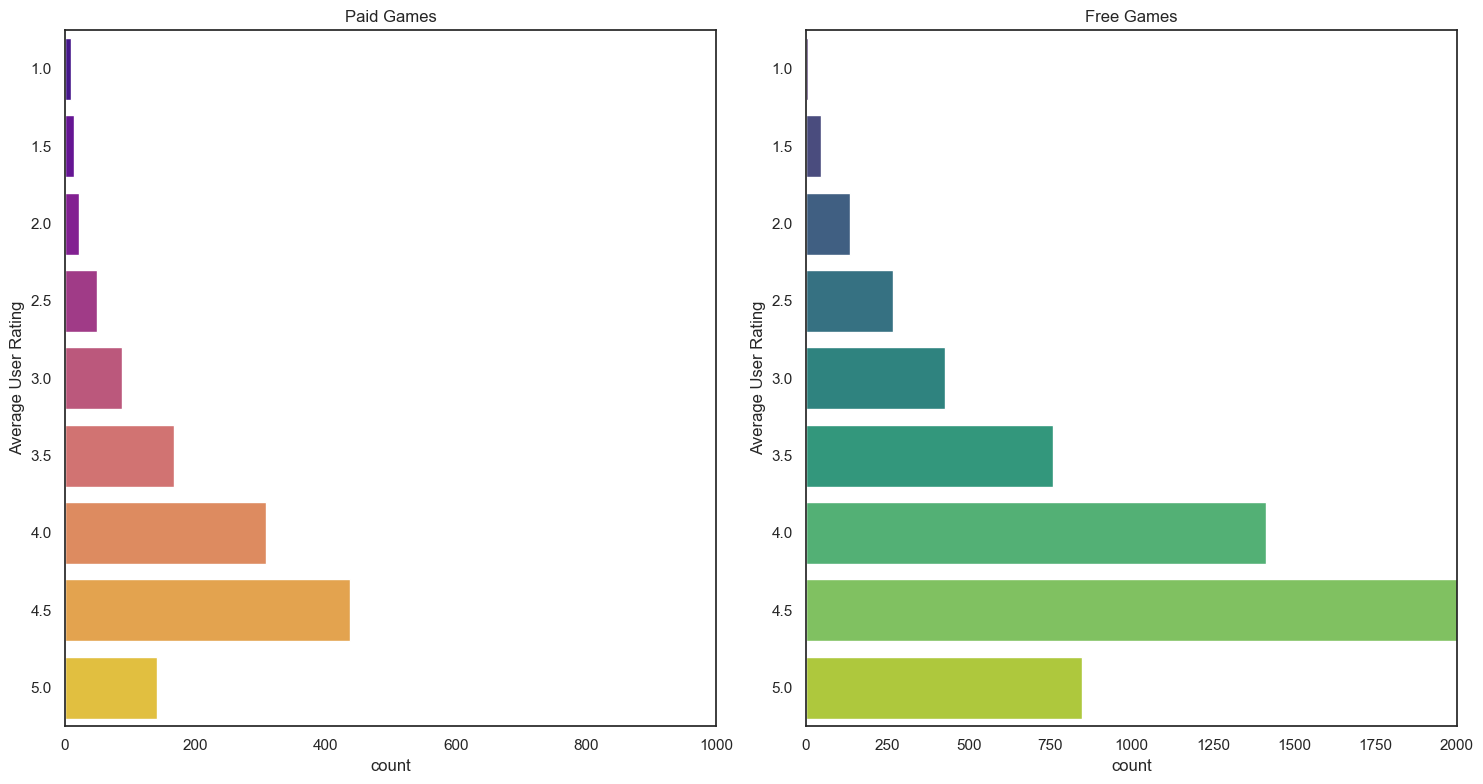

In [16]:
#different version graph
paid = data[data['Price']>0]
free = data[data['Price']==0]
fig, ax = plt.subplots(1, 2, figsize=(15,8))
sns.countplot(data=paid, y='Average User Rating', ax=ax[0], palette='plasma')
ax[0].set_title('Paid Games')
ax[0].set_xlim([0, 1000])

sns.countplot(data=free, y='Average User Rating', ax=ax[1], palette='viridis')
ax[1].set_title('Free Games')
ax[1].set_xlim([0,2000])
plt.tight_layout();
plt.show()

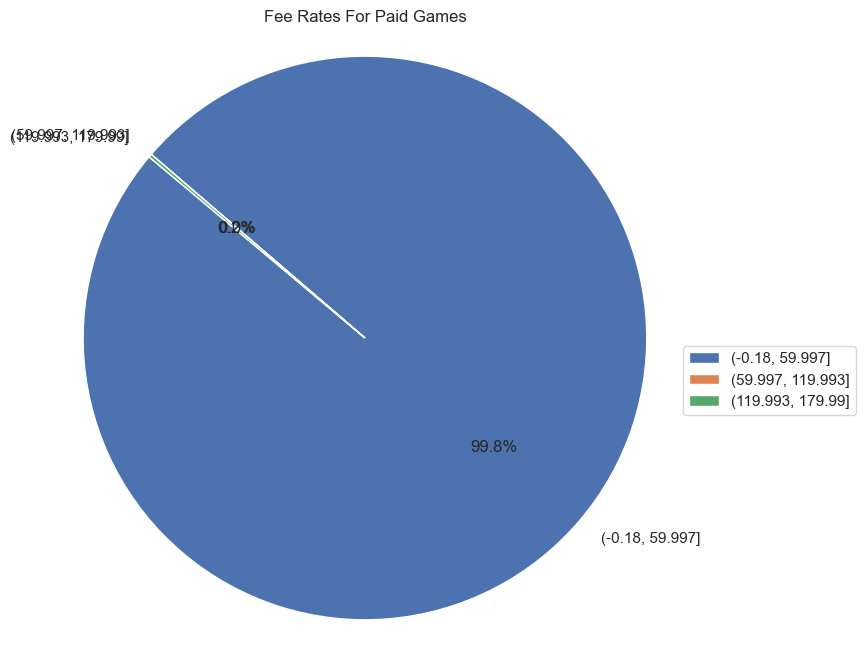

In [17]:
grouped_data = data['Price'].groupby(pd.cut(data['Price'], bins=3)).size()
plt.figure(figsize=(8, 8))
plt.pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Fee Rates For Paid Games') 
plt.legend(labels=grouped_data.index, loc='best', bbox_to_anchor=(1, 0.5))
plt.show()


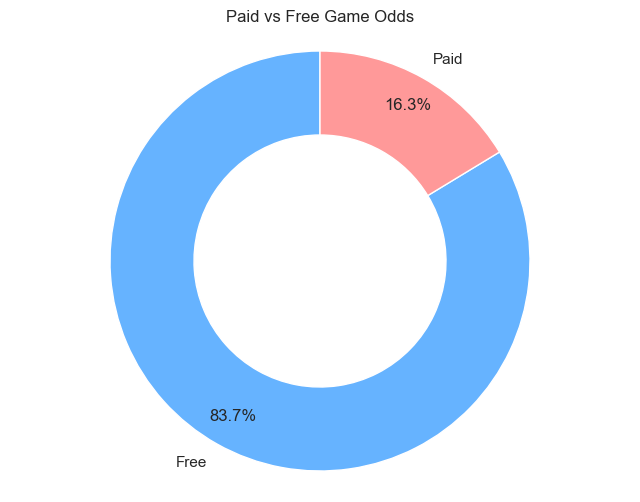

In [18]:

paid_games = data[data['Price'] > 0]
free_games_count = len(data[data['Price'] == 0])
paid_games_count = len(paid_games)

colors = ['#66b3ff', '#ff9999']
plt.figure(figsize=(8, 6))
plt.pie([free_games_count, paid_games_count], labels=['Free', 'Paid'], colors=colors,
        autopct='%1.1f%%', startangle=90, pctdistance=0.85, wedgeprops=dict(width=0.4))
plt.title('Paid vs Free Game Odds')
plt.axis('equal') 
plt.show()


In [19]:
data_type = data['Primary Genre'].dtype
print("type:", data_type)

type: object


In [20]:
genre_count = data['Primary Genre'].value_counts().sort_values(ascending=False)
fig = go.Figure()
fig.add_trace(go.Bar(x=genre_count.index, y=genre_count.values, marker_color='rgb(50, 100, 200)'))
fig.add_trace(go.Scatter(x=genre_count.index, y=genre_count.values, mode='markers+lines', line_color='rgb(200, 50, 100)', 
                         marker=dict(symbol='circle', size=10, color='rgb(200, 50, 100)', line=dict(color='rgb(200, 50, 100)', width=1))))

fig.update_layout(
    hoverlabel=dict(font=dict(family='sans-serif', size=25)),
    title_text="Count of Primary Genres",
    xaxis_title="Primary Genres",
    yaxis_title="Count",
    annotations=[dict(text='Primary Genres', bgcolor='white', font_size=12, showarrow=False)],
    showlegend=False,  )
fig.show()

In [21]:
genre_count = data['Primary Genre'].value_counts().sort_values(ascending=False)
fig = go.Figure(data=[go.Pie(labels=genre_count.index, values=genre_count.values)])
fig.update_layout(hoverlabel=dict(font=dict(family='sans-serif', size=25)),
    title_text="Percent of Primary Genres", annotations=[dict(text='Primary Genres',bgcolor='white', font_size=12, showarrow=False)])
fig.update_traces(hoverinfo='percent', textinfo='label+percent', textfont_size=20,textposition='inside')
fig.show()

In [22]:
genre_count = data['Genres'].value_counts().sort_values(ascending=False)
fig = go.Figure(data=[go.Pie(labels=genre_count.index, values=genre_count.values)])
fig.update_layout(hoverlabel=dict(font=dict(family='sans-serif', size=25)),
    title_text="Percent of Genres", annotations=[dict(text='Genres', bgcolor='white', font_size=6, showarrow=False)])
fig.update_traces(hoverinfo='percent', textinfo='percent', textfont_size=35,textposition='inside')
fig.show()

In [23]:
data.head()

Name Subtitle                                           Icon URL  \
0         Sudoku      NaN  https://is2-ssl.mzstatic.com/image/thumb/Purpl...   
1        Reversi      NaN  https://is4-ssl.mzstatic.com/image/thumb/Purpl...   
2        Morocco      NaN  https://is5-ssl.mzstatic.com/image/thumb/Purpl...   
3  Sudoku (Free)      NaN  https://is3-ssl.mzstatic.com/image/thumb/Purpl...   
4   Senet Deluxe      NaN  https://is1-ssl.mzstatic.com/image/thumb/Purpl...   

   Average User Rating  User Rating Count  Price In-app Purchases  \
0                  4.0             3553.0   2.99              NaN   
1                  3.5              284.0   1.99              NaN   
2                  3.0             8376.0   0.00              NaN   
3                  3.5           190394.0   0.00              NaN   
4                  3.5               28.0   2.99              NaN   

                  Developer Age Rating        Size Primary Genre  \
0  Mighty Mighty Good Games         4+  15853568.0         Games   
1          Kiss The Machine         4+  12328960.0         Games   
2               Bayou Games         4+    674816.0         Games   
3  Mighty Mighty Good Games         4+  21552128.0         Games   
4           RoGame Software         4+  34689024.0         Games   

                              Genres Original Release Date  \
0            Games, Strategy, Puzzle            11/07/2008   
1             Games, Strategy, Board            11/07/2008   
2             Games, Board, Strategy            11/07/2008   
3            Games, Strategy, Puzzle            23/07/2008   
4  Games, Strategy, Board, Education            18/07/2008   

  Current Version Release Date       range  FreeToPlay  
0                   30/05/2017  (3.0, 4.0]           0  
1                   17/05/2018  (3.0, 4.0]           0  
2                    5/09/2017  (2.0, 3.0]           0  
3                   30/05/2017  (3.0, 4.0]           0  
4                   22/07/2018  (3.0, 4.0]           0

Text(0, 0.5, 'Price')

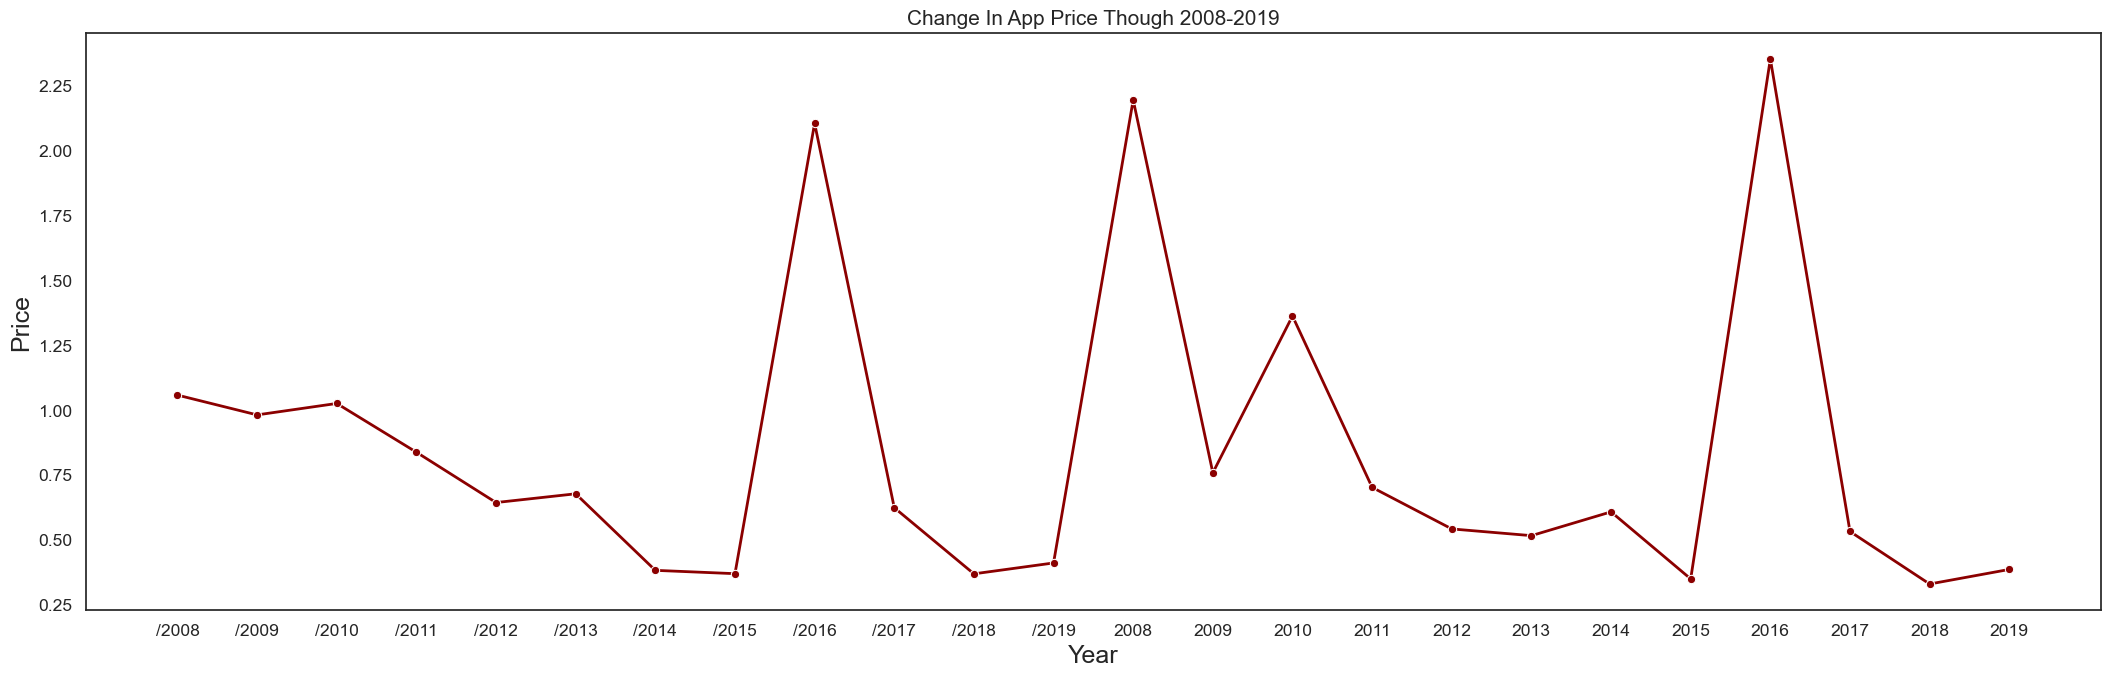

In [24]:
data['Original Release Date NEW'] = data['Original Release Date'].str[5:10]

ord_price = data.groupby('Original Release Date NEW')[['Price']].mean()

fig, ax = plt.subplots(figsize=(26, 7.5))

sns.lineplot(x='Original Release Date NEW', y='Price', data=ord_price, color = 'darkred',ax=ax, marker='o', linewidth = 2)
ax.set_title('Change In App Price Though 2008-2019', fontsize = 15)
ax.tick_params(labelsize=12.6)
ax.set_xlabel('Year',fontsize = 18)
ax.set_ylabel('Price',fontsize = 18)


In [25]:
genre_count = data['Age Rating'].value_counts().sort_values(ascending=False)
fig = go.Figure(data=[go.Pie(labels=genre_count.index, values=genre_count.values)])
fig.update_layout(hoverlabel=dict(font=dict(family='sans-serif', size=25)),
    title_text="Percent of Age Rating", annotations=[dict(text='Age Rating', bgcolor='white', font_size=6, showarrow=False)])
fig.update_traces(hoverinfo='percent', textinfo='percent', textfont_size=35,textposition='inside')
fig.show()

In [26]:
date_format = "%d/%m/%Y"
data['Original Release Date'] = pd.to_datetime(data['Original Release Date'], format=date_format)
data['Current Version Release Date'] = pd.to_datetime(data['Current Version Release Date'], format=date_format)

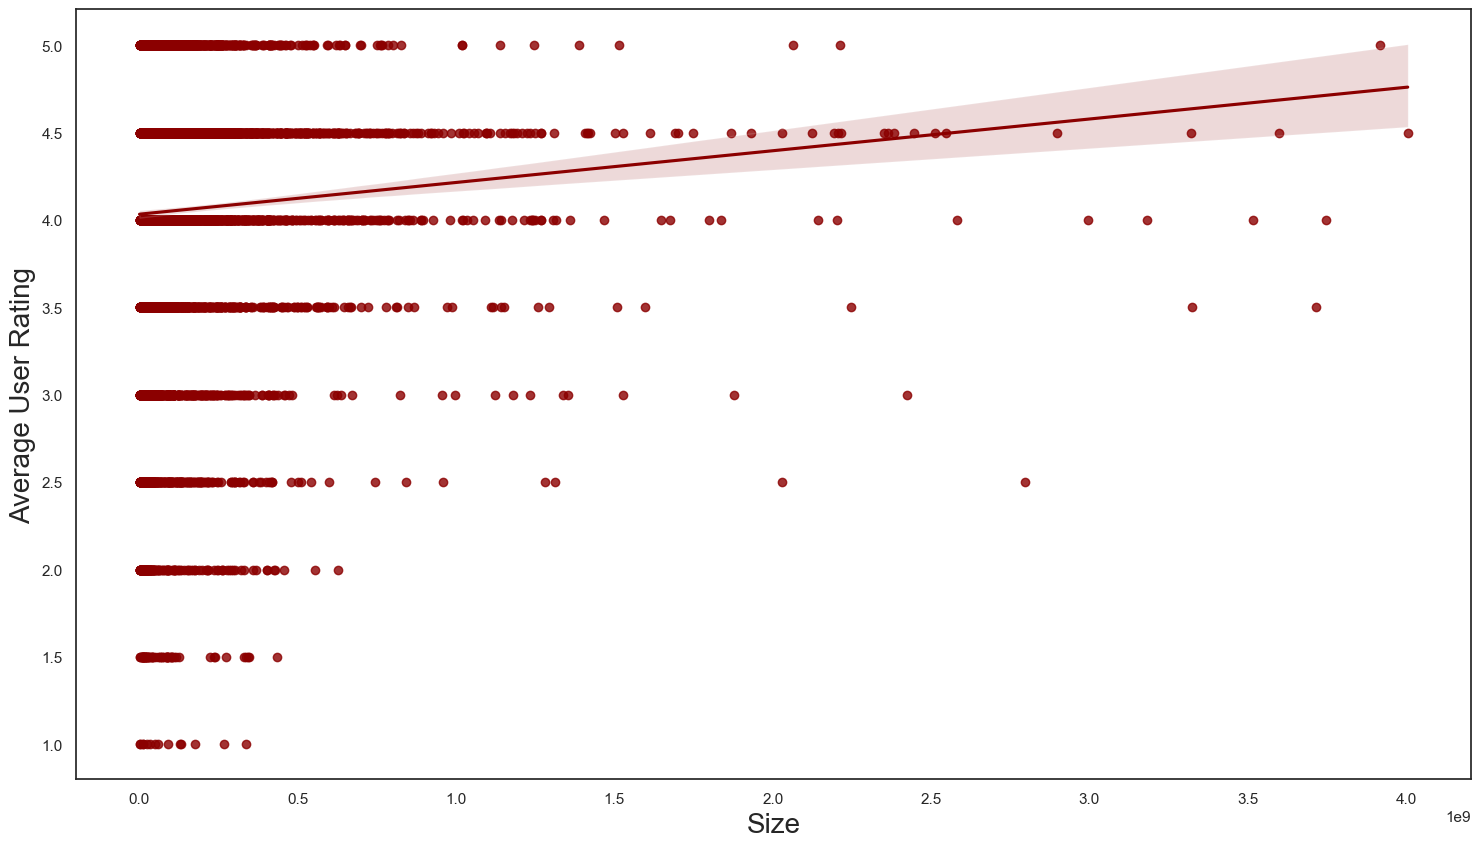

In [27]:
plt.figure(figsize=(18,10), dpi= 100)
ax = sns.regplot(data=data, x='Size', y='Average User Rating', color = 'darkred')
ax.set_ylabel('Average User Rating', fontsize = 20)
ax.set_xlabel('Size', fontsize = 20)
plt.show()

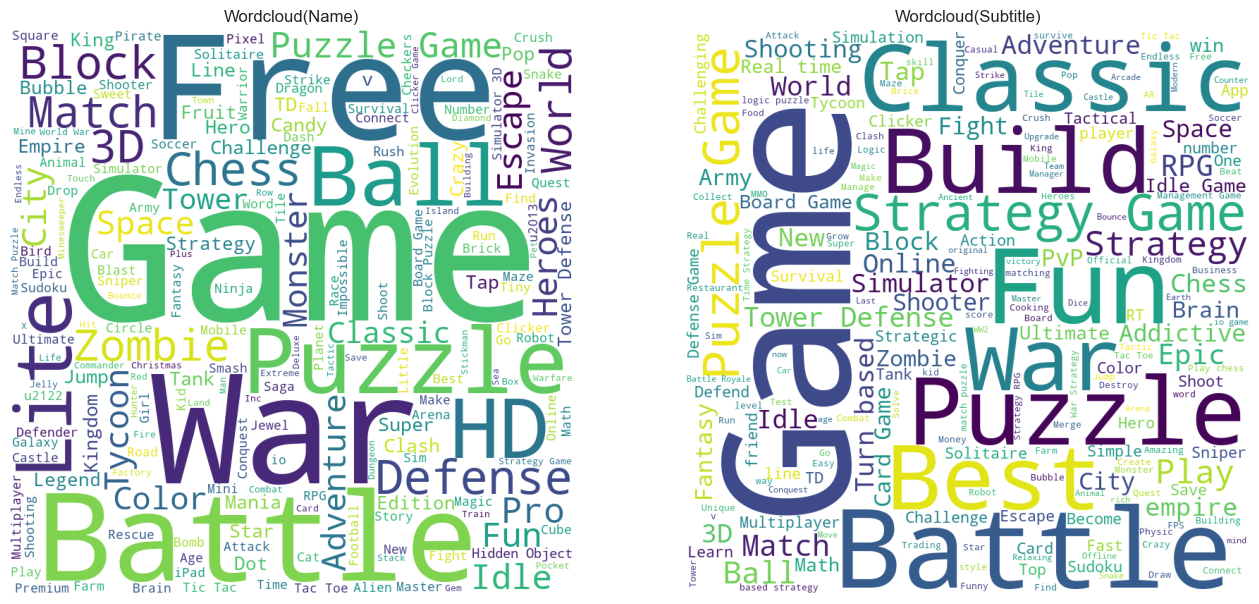

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(16,32))
wordcloud = WordCloud(background_color='white',width=800, height=800).generate(' '.join(data['Name']))
wordcloud_sub = WordCloud(background_color='white',width=800, height=800).generate(' '.join(data['Subtitle'].dropna().astype(str)) )
ax[0].imshow(wordcloud)
ax[0].axis('off')
ax[0].set_title('Wordcloud(Name)')
ax[1].imshow(wordcloud_sub)
ax[1].axis('off')
ax[1].set_title('Wordcloud(Subtitle)')
plt.show()

In [29]:
#Top 5 apps with the best rating and highest rating count

top_games = data.loc[(data['User Rating Count'] >= 100000)]
top_2 = top_games.loc[(top_games['Average User Rating'] == 5)]
top_3 = top_2.groupby(['Name']).agg({"Average User Rating":"sum", "User Rating Count":"sum"}).sort_values(by = 'User Rating Count', ascending = False).head(5)
top_3

Average User Rating  User Rating Count
Name                                                                     
Cash, Inc. Fame & Fortune Game                     5.0           374772.0
Egg, Inc.                                          5.0           174591.0
AFK Arena                                          5.0           156766.0
South Park: Phone Destroyer\u2122                  5.0           156044.0
From Zero to Hero: Cityman                         5.0           146729.0

In [30]:
review = data.sort_values(by='User Rating Count', ascending=False)[['Name', 'Price', 'Average User Rating', 'Size', 'User Rating Count', 'Icon URL']].head(10)
review.iloc[:, 0:-1]

Name  Price  Average User Rating  \
1378                   Clash of Clans    0.0                  4.5   
7187                     Clash Royale    0.0                  4.5   
13414                     PUBG MOBILE    0.0                  4.5   
1921       Plants vs. Zombies\u2122 2    0.0                  4.5   
8139                    Pok\xe9mon GO    0.0                  3.5   
2410                       Boom Beach    0.0                  4.5   
12473  Cash, Inc. Fame & Fortune Game    0.0                  5.0   
8632   Idle Miner Tycoon: Cash Empire    0.0                  4.5   
38                         TapDefense    0.0                  3.5   
3550       Star Wars\u2122: Commander    0.0                  4.5   

               Size  User Rating Count  
1378   1.612196e+08          3032734.0  
7187   1.451080e+08          1277095.0  
13414  2.384082e+09           711409.0  
1921   1.207634e+08           469562.0  
8139   2.815212e+08           439776.0  
2410   2.027858e+08           400787.0  
12473  2.459576e+08           374772.0  
8632   4.439747e+08           283035.0  
38     7.774384e+06           273687.0  
3550   1.230838e+08           259030.0